In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv')
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,b7f2ea02-87f9-4703-99c0-2a5da1550ed0,Sahara Gonna,I can't log in I have to pay it but I pay it s...,1,0,NaN,2024-05-13 23:35:28,NaN
1,1e93bd7d-2e5e-449d-a304-afa0212afcf5,Kaylee Neel,I love Netflix is so good I love it so much,5,0,8.113.2 build 27 50674,2024-05-13 23:00:54,8.113.2 build 27 50674
2,afd72658-f2b1-4424-80cb-0f4ed7f138c1,Emad Moadamani,Good,3,0,8.113.3 build 31 50678,2024-05-13 22:45:29,8.113.3 build 31 50678
3,87833ccb-386c-4c66-bbd3-361a733ad974,lucas Duarte,This was good when people could actually use i...,1,0,8.114.0 build 19 50680,2024-05-13 22:29:59,8.114.0 build 19 50680
4,a67ae2d4-da9e-4b4a-9195-533d4ff00d37,Evynn Leus-Ross,"Was working perfectly up until last month, it ...",1,0,8.114.0 build 19 50680,2024-05-13 22:27:17,8.114.0 build 19 50680


In [3]:
len(df)

108494

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              108494 non-null  object
 1   userName              108493 non-null  object
 2   content               108494 non-null  object
 3   score                 108494 non-null  int64 
 4   thumbsUpCount         108494 non-null  int64 
 5   reviewCreatedVersion  93153 non-null   object
 6   at                    108494 non-null  object
 7   appVersion            93153 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.6+ MB


In [5]:
df.userName.value_counts

<bound method IndexOpsMixin.value_counts of 0            Sahara Gonna
1             Kaylee Neel
2          Emad Moadamani
3            lucas Duarte
4         Evynn Leus-Ross
               ...       
108489      A Google user
108490       Captain Jeoy
108491           Suryansh
108492      A Google user
108493         suraj soni
Name: userName, Length: 108494, dtype: object>

In [6]:
#check for missing values
df.isnull().sum()

reviewId                    0
userName                    1
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    15341
at                          0
appVersion              15341
dtype: int64

<Axes: >

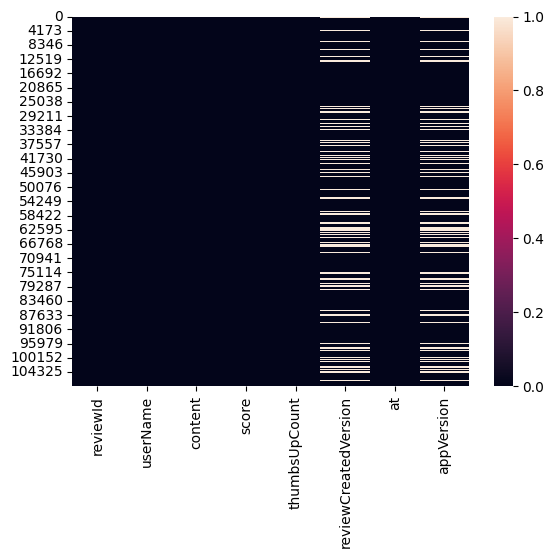

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
len(df.reviewCreatedVersion.unique())

545

Let's drop this coloumn

In [9]:
df.drop(['reviewCreatedVersion'], axis=1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       108494 non-null  object
 1   userName       108493 non-null  object
 2   content        108494 non-null  object
 3   score          108494 non-null  int64 
 4   thumbsUpCount  108494 non-null  int64 
 5   at             108494 non-null  object
 6   appVersion     93153 non-null   object
dtypes: int64(2), object(5)
memory usage: 5.8+ MB


In [11]:
len(df.appVersion.unique())

545

In [12]:
df.drop(['appVersion'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       108494 non-null  object
 1   userName       108493 non-null  object
 2   content        108494 non-null  object
 3   score          108494 non-null  int64 
 4   thumbsUpCount  108494 non-null  int64 
 5   at             108494 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.0+ MB


In [13]:
df.score.value_counts()

score
1    42503
5    30327
4    13534
3    11647
2    10483
Name: count, dtype: int64

In [14]:
df.score.unique()

array([1, 5, 3, 2, 4])

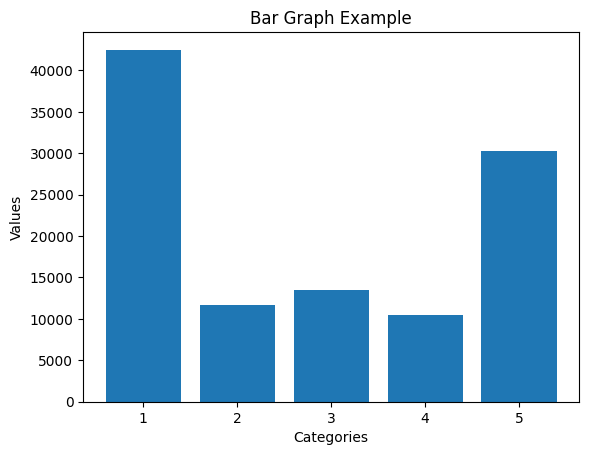

In [15]:
import matplotlib.pyplot as plt

plt.bar(df.score.unique(), df.score.value_counts())

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Graph')
plt.show()

In [16]:
df.thumbsUpCount.value_counts()

thumbsUpCount
0       73735
1       14348
2        5180
3        2776
4        1659
        ...  
1172        1
542         1
536         1
459         1
697         1
Name: count, Length: 899, dtype: int64

In [17]:
len(df.thumbsUpCount.unique())

899

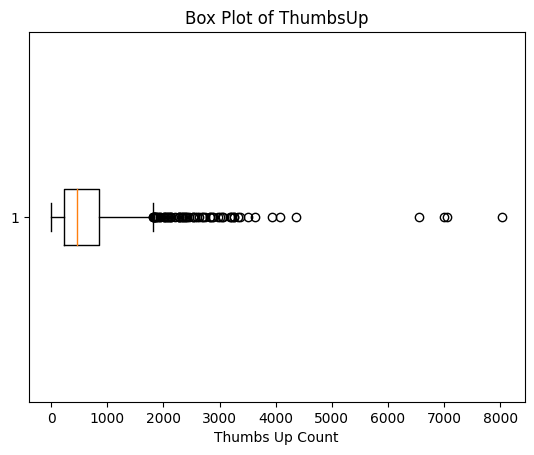

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df.thumbsUpCount.unique(), vert=False)

plt.xlabel('Thumbs Up Count')
plt.title('Box Plot of ThumbsUp')

plt.show()

In [19]:
data = df.thumbsUpCount
mean = np.mean(data)
std_dev = np.std(data)

z_score_threshold = 3
z_scores = (data - mean) / std_dev

outliers = np.abs(z_scores) > z_score_threshold
filtered_data = data[outliers]
print("Outliers):", filtered_data)
print("Number of Outliers: ",len(data[outliers]))

Outliers): 1036      636
1037     2282
1038      356
1040     1186
1042      349
         ... 
64394     466
66525     319
72312     695
72743     323
80741     730
Name: thumbsUpCount, Length: 961, dtype: int64
Number of Outliers:  961


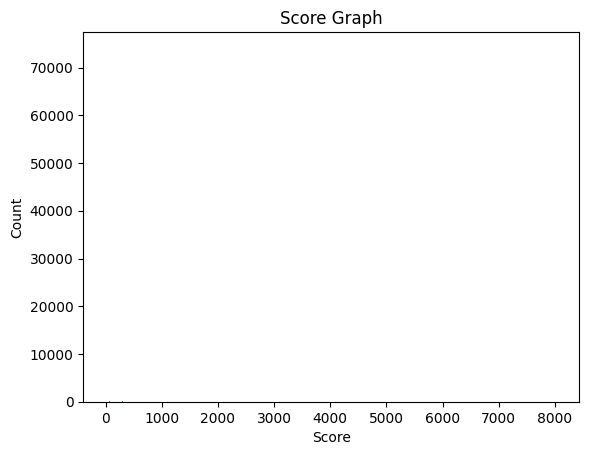

In [52]:
plt.bar(df.thumbsUpCount.unique(), df.thumbsUpCount.value_counts())
plt.xlabel('thumbsUpCount')
plt.ylabel('Count')
plt.title('Score Graph')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       108494 non-null  object
 1   userName       108493 non-null  object
 2   content        108494 non-null  object
 3   score          108494 non-null  int64 
 4   thumbsUpCount  108494 non-null  int64 
 5   at             108494 non-null  object
 6   date           108494 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.8+ MB


In [26]:
len(df.content.unique())

108232

In [29]:
df['date'] = pd.to_datetime(df['date'])
df.date.dtypes

dtype('<M8[ns]')

In [31]:
df['date'] = df['date'].dt.date

In [33]:
print(df.date)

0         2024-05-13
1         2024-05-13
2         2024-05-13
3         2024-05-13
4         2024-05-13
             ...    
108489    2019-08-03
108490    2022-08-15
108491    2020-08-17
108492    2019-07-21
108493    2020-05-24
Name: date, Length: 108494, dtype: object


In [37]:
len(df.date.unique())

2071

In [39]:
df['date'] = pd.to_datetime(df['date'])
df.date.dtypes

dtype('<M8[ns]')

In [43]:
df.drop(columns=['reviewId','userName','content','at'], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   score          108494 non-null  int64         
 1   thumbsUpCount  108494 non-null  int64         
 2   date           108494 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 MB


In [47]:
print(df.date.max())
print(df.date.min())

2024-05-13 00:00:00
2018-09-12 00:00:00


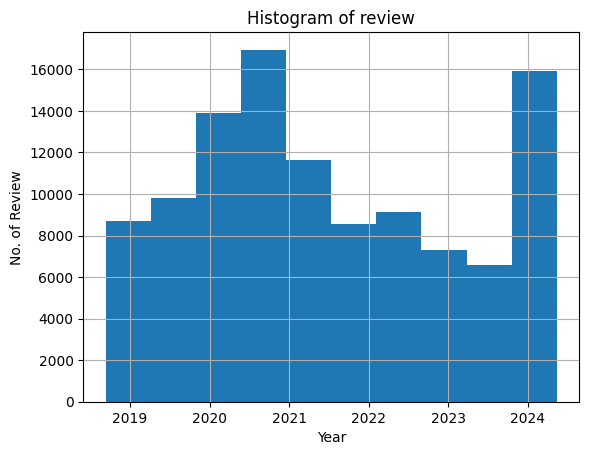

In [51]:
plt.hist(df.date) 
plt.xlabel('Year')
plt.ylabel('No. of Review')
plt.title('Histogram of review')
plt.grid(True)
plt.show()

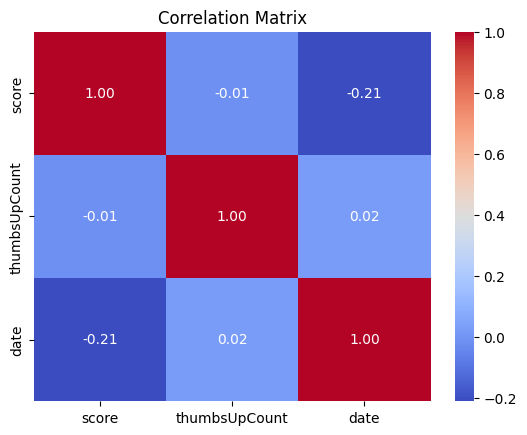

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()